In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR10 Task IL epoch'


viz = Visualization(project=project,UID=['batch_size_rehearsal', 'learning_rate', 'epochs'], y_min=30)

In [3]:
viz.extract_all_runs_metrics_after_task_3()

In [4]:
from matplotlib import pyplot as plt
import numpy as np


def box_plot(metric_name, df, filename=None, fontsize=30):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(int(df[df['UID'] == uid]['mean_acc_max'].iloc[0]))

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    labels = [f"{uid.split(';')[2]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf')
        plt.savefig("images/"+filename+".svg", format='svg')

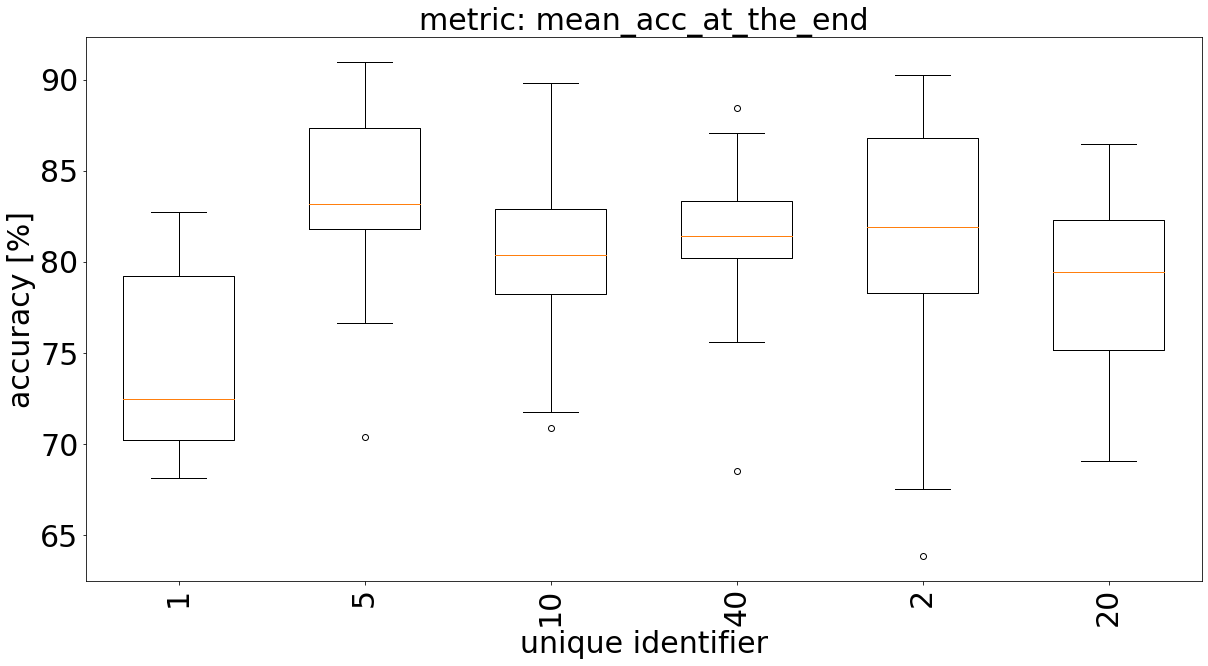

In [5]:
df = viz.metrics_df.copy()

metric = 'mean_acc_at_the_end'
box_plot(metric, df, filename=f"epoch_{metric}")

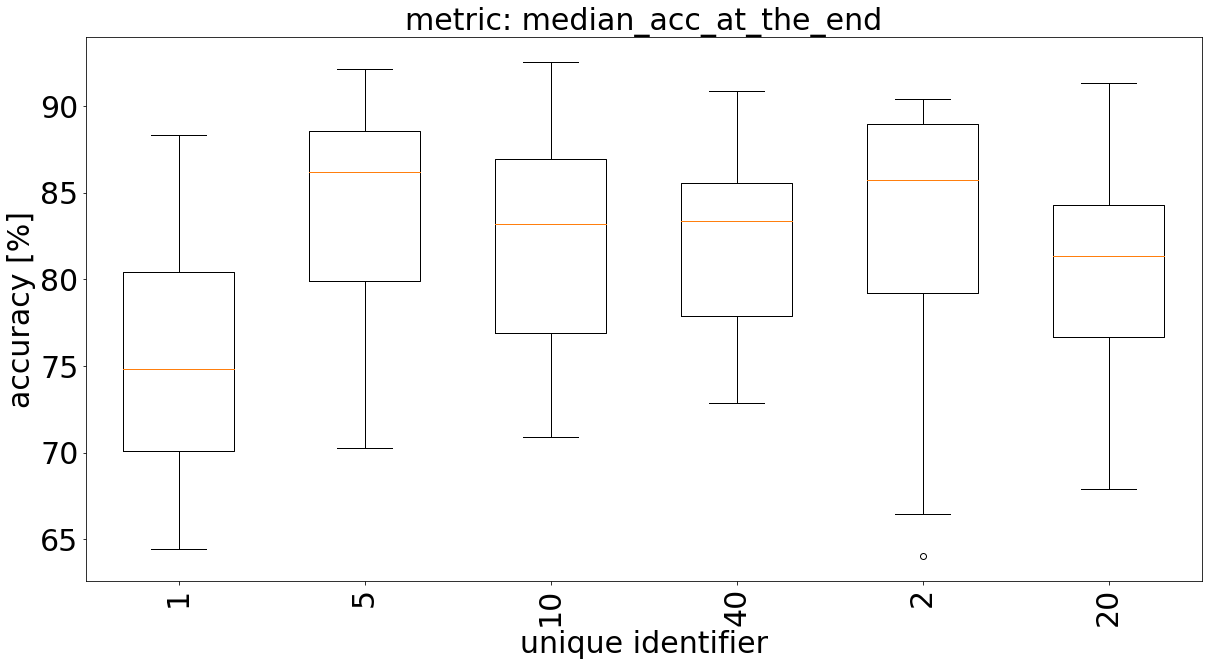

In [6]:
df = viz.metrics_df.copy()
metric = 'median_acc_at_the_end'
box_plot(metric, df, filename=f"epoch_{metric}")

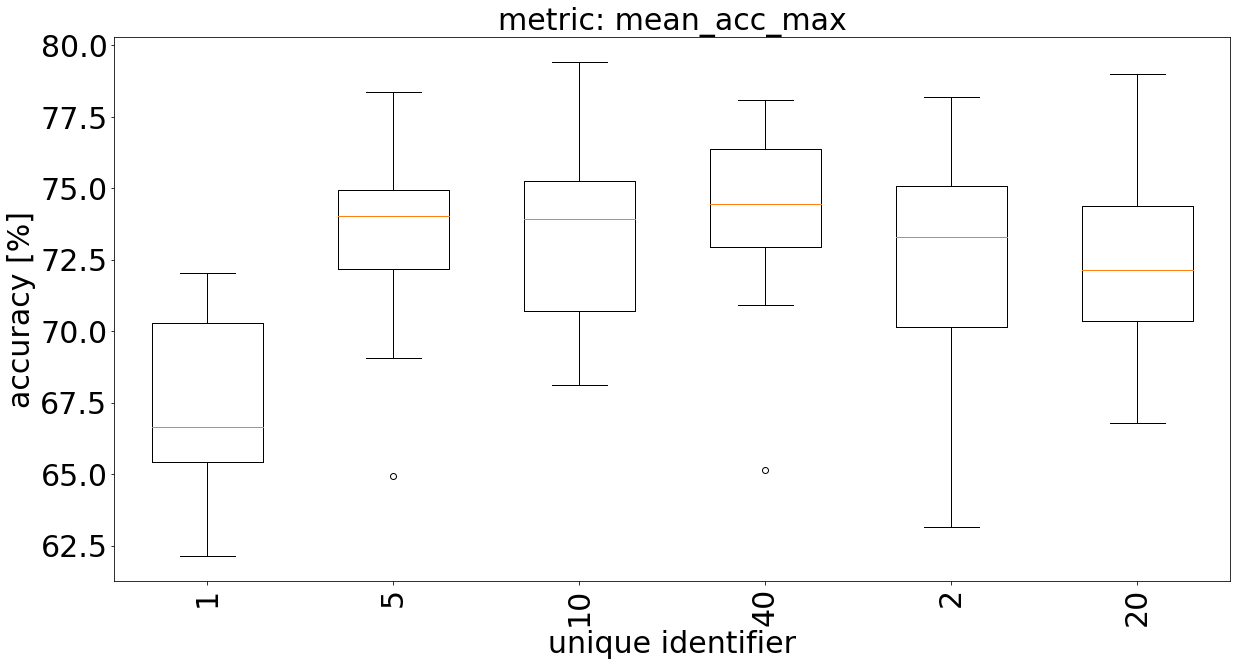

In [7]:
metric = 'mean_acc_max'
box_plot(metric, df, filename=f"epoch_{metric}")

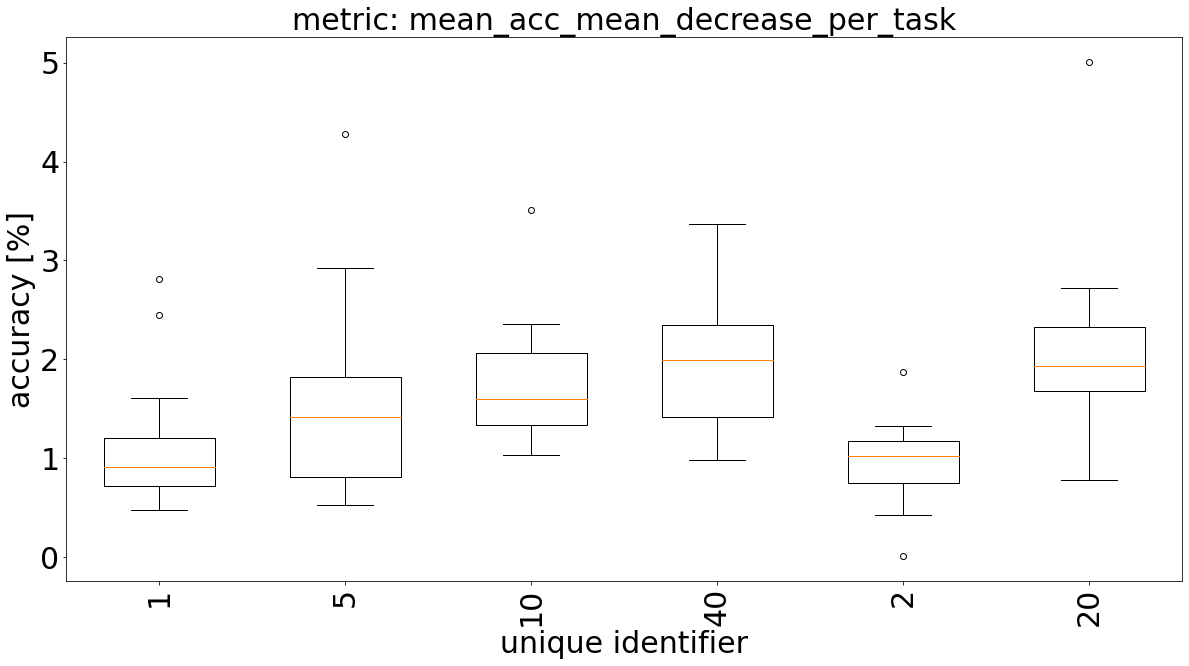

In [8]:
metric = 'mean_acc_mean_decrease_per_task'
box_plot(metric, df, filename=f"epoch_{metric}")

In [9]:
df

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,acc_min4,split,batch_size_rehearsal,learning_rate,epochs,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,256;0.003;40;,70.400002,75.426667,3.150000,83.000000,52.299999,79.699997,77.499089,2.283335,86.550003,...,49.150002,test,256,0.003,40,81.666667,79.699997,34.387645,2.401667,75.460001
1,256;0.003;40;,69.400002,73.997135,3.237499,82.349998,50.000000,87.150002,83.774675,1.983332,93.099998,...,43.200001,test,256,0.003,40,82.433334,87.150002,33.079815,1.194166,74.199999
2,256;0.003;40;,73.099998,77.179844,2.612501,83.550003,49.849998,77.050003,73.791667,1.683332,82.099998,...,44.450001,test,256,0.003,40,80.333333,77.050003,33.440137,2.339167,73.080000
3,256;0.003;40;,78.650002,78.952396,1.949999,86.449997,46.950001,71.500000,71.967904,3.233332,81.199997,...,40.299999,test,256,0.003,40,80.966667,78.650002,32.917065,1.336666,74.439999
4,256;0.003;40;,90.849998,89.927500,0.862501,94.300003,45.250000,82.699997,81.451953,3.000000,91.699997,...,48.950001,test,256,0.003,40,88.433332,90.849998,36.067086,1.367501,78.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,256;0.003;2;,77.050003,78.503125,1.949999,84.849998,51.299999,81.150002,73.652564,1.449999,85.500000,...,46.950001,test,256,0.003,2,80.866669,81.150002,32.575997,1.325000,72.300000
106,256;0.003;1;,79.400002,75.264583,0.000000,79.400002,44.799999,82.699997,72.887499,0.366669,83.800003,...,45.049999,test,256,0.003,1,78.750000,79.400002,31.470417,0.608334,69.330002
107,256;0.003;2;,85.699997,79.581250,0.000000,85.699997,49.750000,80.300003,72.329487,0.049998,80.449997,...,46.000000,test,256,0.003,2,84.616666,85.699997,32.426550,0.010000,73.369998
108,256;0.003;1;,58.150002,56.831250,1.212500,63.000000,50.599998,66.349998,61.077501,0.850001,68.900002,...,50.200001,test,256,0.003,1,68.116666,66.349998,28.032646,0.802500,62.370000


In [10]:
df.value_counts('UID')

UID
256;0.003;5;     25
256;0.003;10;    20
256;0.003;1;     20
256;0.003;20;    15
256;0.003;2;     15
256;0.003;40;    15
dtype: int64

In [11]:
# viz.plot_single_setting_aggregated('stat-wmm;256;0.003;5', fontsize=30, filename='batch_size_256', layout='vertical_short', plot_till=3/5)

In [12]:
# viz.plot_single_setting_aggregated('stat-wmm;512;0.003;5', fontsize=30, filename='batch_size_512', layout='vertical_short', plot_till=3/5)

In [13]:
# viz.plot_single_setting_aggregated('stat-wmm;16;0.003;5', fontsize=30, filename='batch_size_16', layout='vertical_short', plot_till=3/5)

# All runs

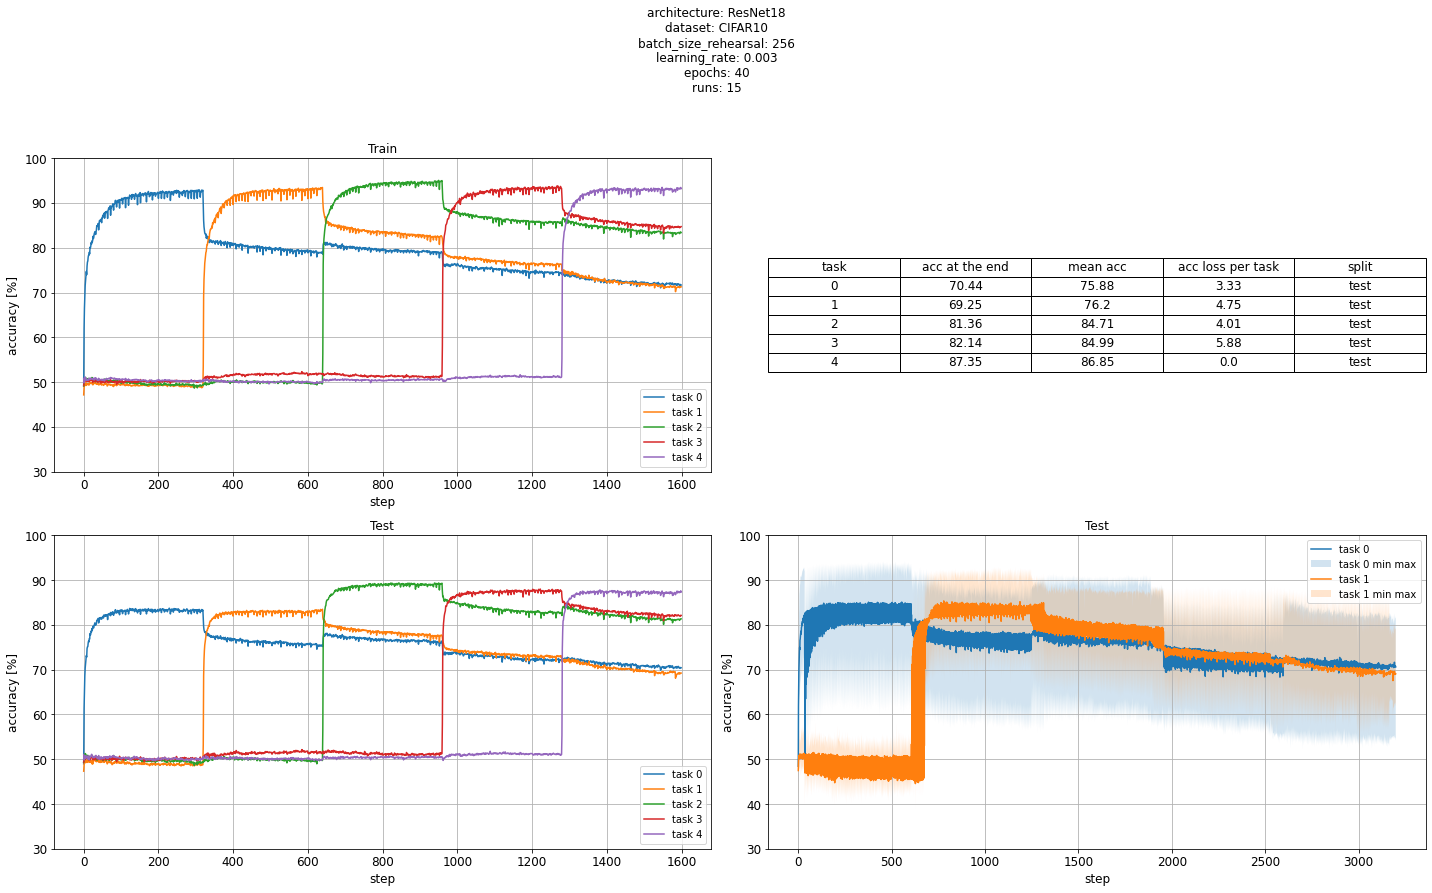

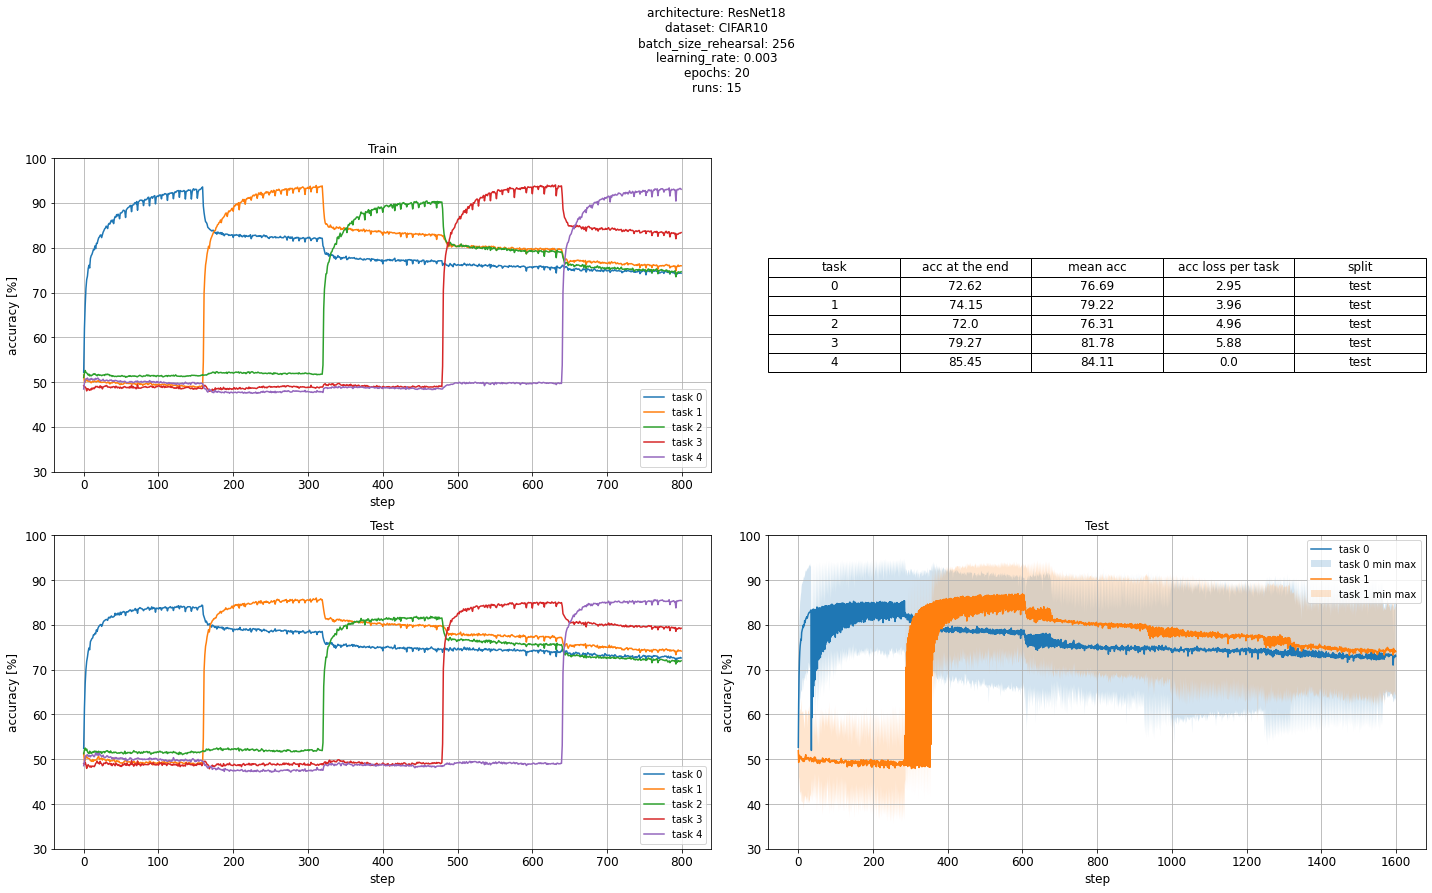

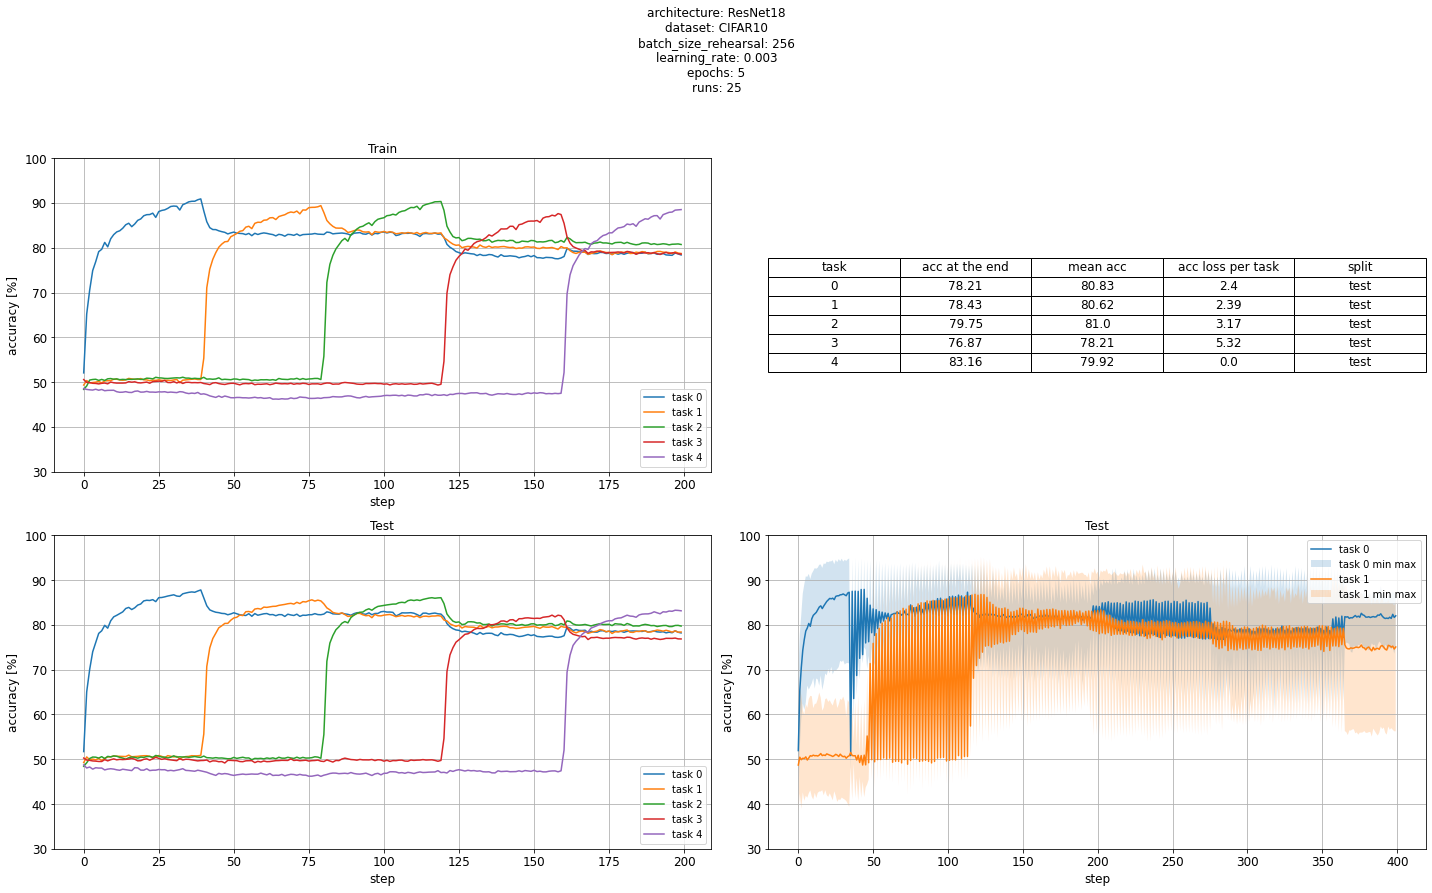

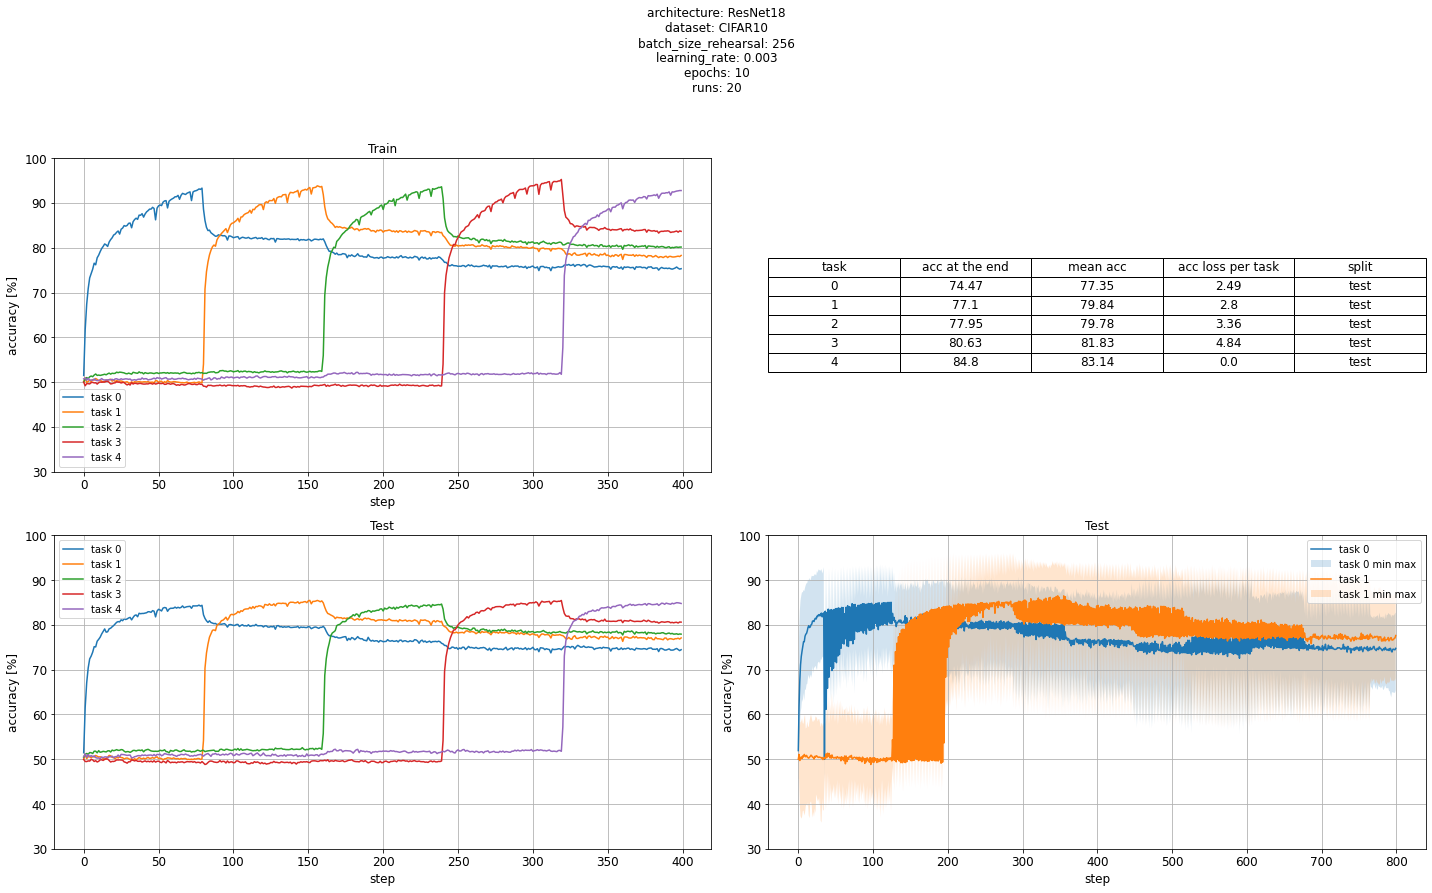

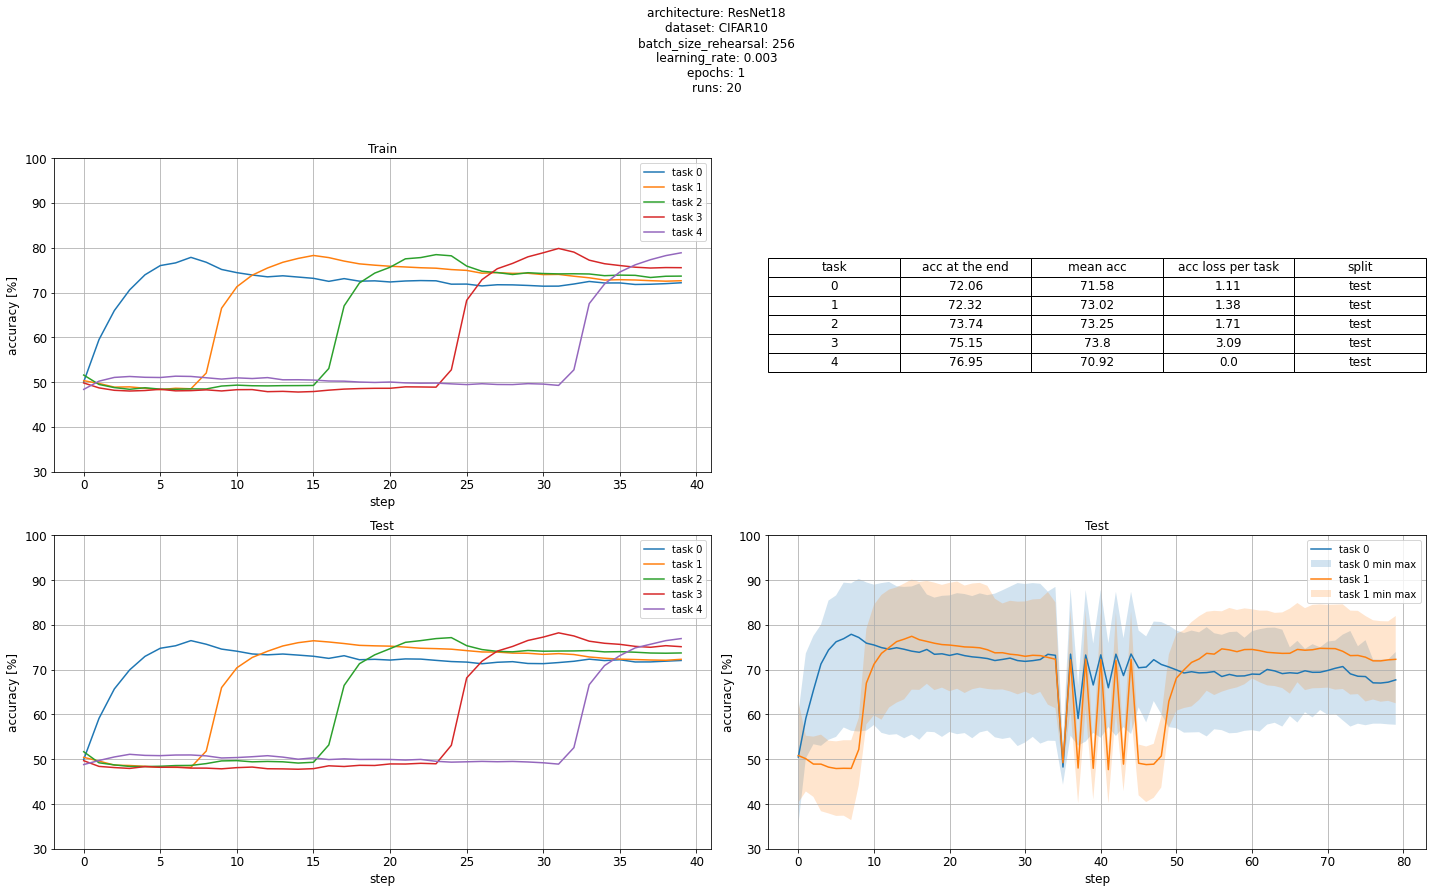

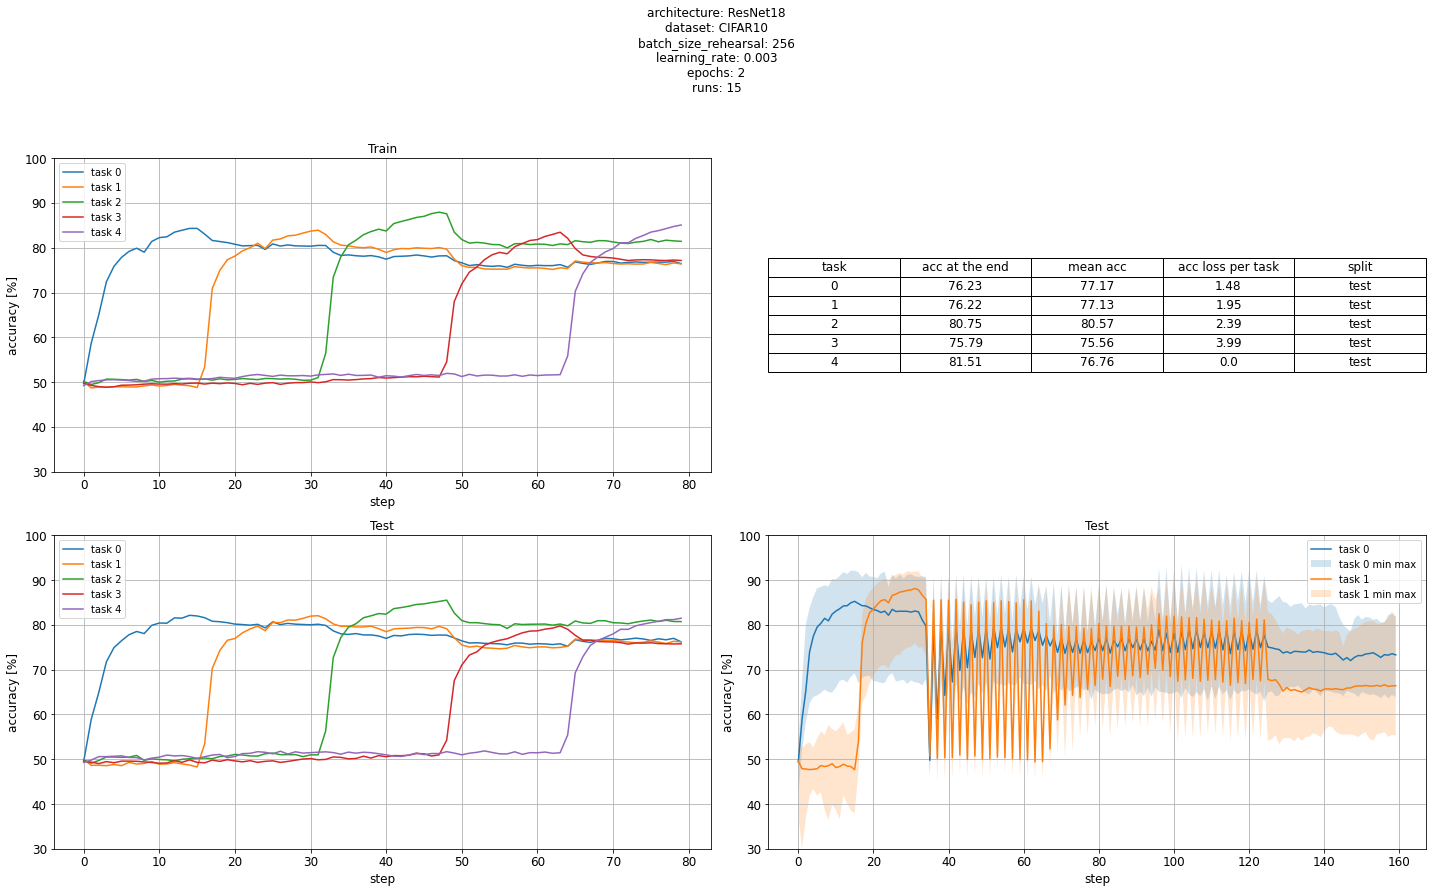

In [14]:
viz.plot_everything()

In [15]:
viz.runs_params_settings_idxs_dict.keys()

dict_keys(['256;0.003;40', '256;0.003;20', '256;0.003;5', '256;0.003;10', '256;0.003;1', '256;0.003;2'])

In [16]:
viz.plot_single_setting_all_runs('stat-wmm;256;0.003;5')

KeyError: 'stat-wmm;256;0.003;5'

In [ ]:
viz.plot_single_setting_all_runs('stat-wmm;512;0.003;5')

KeyError: 'stat-wmm;512;0.003;5'